In [237]:
import pandas as pd
import numpy as np
import tweepy
import json
import requests
import re
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Twitter archive file

## 1- Gathering data

In [238]:
twitter_archive= pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

### The Volume of twitter_archive

In [239]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

## 2- Assessing data

- Assess data visually as well as programmatically using pandas for quality and tidiness issues.


In [240]:
# display sample of data
twitter_archive.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2251  667806454573760512                    NaN                  NaN   
1610  685532292383666176                    NaN                  NaN   
1242  711998809858043904                    NaN                  NaN   
35    885518971528720385                    NaN                  NaN   
415   822647212903690241                    NaN                  NaN   

                      timestamp  \
2251  2015-11-20 20:47:20 +0000   
1610  2016-01-08 18:43:29 +0000   
1242  2016-03-21 19:31:59 +0000   
35    2017-07-13 15:19:09 +0000   
415   2017-01-21 03:29:14 +0000   

                                                 source  \
2251  <a href="http://twitter.com/download/iphone" r...   
1610  <a href="http://twitter.com/download/iphone" r...   
1242  <a href="http://twitter.com/download/iphone" r...   
35    <a href="http://twitter.com/download/iphone" r...   
415   <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
2251  This is Filup. He is overcome with joy after f...                  NaN   
1610  For the last time, WE. DO. NOT. RATE. BULBASAU...                  NaN   
1242  RT @twitter: @dog_rates Awesome Tweet! 12/10. ...         7.119983e+17   
35    I have a new hero and his name is Howard. 14/1...                  NaN   
415   RT @dog_rates: This is Paisley. She really wan...         8.224891e+17   

      retweeted_status_user_id retweeted_status_timestamp  \
2251                       NaN                        NaN   
1610                       NaN                        NaN   
1242              7.832140e+05  2016-03-21 19:29:52 +0000   
35                         NaN                        NaN   
415               4.196984e+09  2017-01-20 17:00:46 +0000   

                                          expanded_urls  rating_numerator  \
2251  https://twitter.com/dog_rates/status/667806454...                10   
1610  https://twitter.com/dog_rates/status/685532292...                 9   
1242  https://twitter.com/twitter/status/71199827977...                12   
35    https://twitter.com/4bonds2carbon/status/88551...                14   
415   https://twitter.com/dog_rates/status/822489057...                13   

      rating_denominator     name doggo floofer pupper puppo  
2251                  10    Filup  None    None   None  None  
1610                  10     None  None    None   None  None  
1242                  10     None  None    None   None  None  
35                    10     None  None    None   None  None  
415                   10  Paisley  None    None   None  None

### Check tweet id is Unique 

In [241]:
twitter_archive.tweet_id.is_unique

True

In [242]:
#use twitter_archive
twitter_archive.set_index('tweet_id', inplace = True)

In [243]:
# check if dogs have more than one category assigned
categories = ['doggo', 'floofer', 'pupper', 'puppo']

for category in categories:
    twitter_archive[category] = twitter_archive[category].apply(lambda x: 0 if x == 'None' else 1)

twitter_archive['number_categories'] = twitter_archive.loc[:,categories].sum(axis = 1)

## Check the vaules of rating_numerator column

In [244]:
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

###  Check the vaules of  rating_denominator column

In [245]:
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [246]:
# check if any float ratings in the text column
display(twitter_archive[['text', 'rating_numerator', 'rating_denominator']][twitter_archive['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            )


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


text  \
tweet_id                                                                
883482846933004288  This is Bella. She hopes her smile made you sm...   
832215909146226688  RT @dog_rates: This is Logan, the Chow who liv...   
786709082849828864  This is Logan, the Chow who lived. He solemnly...   
778027034220126208  This is Sophie. She's a Jubilant Bush Pupper. ...   
681340665377193984  I've been told there's a slight possibility he...   
680494726643068929  Here we have uncovered an entire battalion of ...   

                    rating_numerator  rating_denominator  
tweet_id                                                  
883482846933004288                 5                  10  
832215909146226688                75                  10  
786709082849828864                75                  10  
778027034220126208                27                  10  
681340665377193984                 5                  10  
680494726643068929                26                  10

In [247]:
# check expanded urls
twitter_archive[['text','expanded_urls']][~twitter_archive['expanded_urls'].str.startswith(('https://twitter.com','http://twitter.com', 'https://vine.co'), na=False)].sample(3)


text  \
tweet_id                                                                
686035780142297088  Yes I do realize a rating of 4/20 would've bee...   
842765311967449089  Meet Indie. She's not a fan of baths but she's...   
840698636975636481  @0_kelvin_0 &gt;10/10 is reserved for puppos s...   

                                                        expanded_urls  
tweet_id                                                               
686035780142297088                                                NaN  
842765311967449089  https://www.gofundme.com/get-indie-home/,https...  
840698636975636481                                                NaN

In [248]:
# check for two or more urls in the expanded urls
twitter_archive['expanded_urls'][twitter_archive['expanded_urls']
                .str.contains(',', na = False)].count()

639


## Quality & Tidiness Issues in twitter_archive

- Delete columns that won't be used for analysis.
- The timestamp should be DateTime.
- some of the gathered tweets are replies and should be removed.
- some of the gathered tweets are retweets.
- Dog 'stage' classification (doggo, floofer, pupper or puppo) should be one column.
- some dogs have more than one category assigned.
- Correct denominators other than 10.
- float ratings have been incorrectly read from the text of tweet.
- we have 639 expanded urls which contain more than one url address.

## 3- Cleaning Data

- Using pandas, clean the quality and tidiness issues identified in the Assessing Data section.

In [249]:
twitter_archive_clean=twitter_archive.copy() 

In [250]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 892420643555336193 to 666020888022790149
Data columns (total 17 columns):
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null int64
floofer                       2356 non-null int64
pupper                        2356 non-null int64
puppo                         2356 non-null int64
number_categories             2356 non-null int64
dtype

In [251]:
# drop retweets                                                 
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]


In [252]:
#test 
print(sum(twitter_archive_clean['retweeted_status_user_id'].value_counts()))

0


In [253]:
# drop columns contain alot of nan more than 50% 
twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                      'retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace =True)

In [254]:
#test
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 892420643555336193 to 666020888022790149
Data columns (total 12 columns):
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null int64
floofer               2175 non-null int64
pupper                2175 non-null int64
puppo                 2175 non-null int64
number_categories     2175 non-null int64
dtypes: int64(7), object(5)
memory usage: 220.9+ KB


### Define
  - Dog classification (doggo, floofer, pupper or puppo) should be one column.
  - Some dogs have more than one category assigned.


## code

In [255]:
# read dog types from text column
for index, column in twitter_archive_clean.iterrows():
    for word in ['puppo', 'pupper', 'doggo', 'floofer']:
        if word.lower() in str(twitter_archive_clean.loc[index, 'text']).lower():
            twitter_archive_clean.loc[index, 'dog_type'] = word.title()
            
# drop old columns
twitter_archive_clean.drop(['puppo',
                       'pupper',
                       'doggo',
                       'floofer'],
                      axis=1, inplace=True)

## Test

In [256]:
twitter_archive_clean.sample(3)

timestamp  \
tweet_id                                        
871515927908634625  2017-06-04 23:56:03 +0000   
687476254459715584  2016-01-14 03:28:06 +0000   
724771698126512129  2016-04-26 01:26:53 +0000   

                                                               source  \
tweet_id                                                                
871515927908634625  <a href="http://twitter.com/download/iphone" r...   
687476254459715584  <a href="http://twitter.com/download/iphone" r...   
724771698126512129  <a href="http://twitter.com/download/iphone" r...   

                                                                 text  \
tweet_id                                                                
871515927908634625  This is Napolean. He's a Raggedy East Nicaragu...   
687476254459715584  This is Curtis. He's a fluffball. 11/10 would ...   
724771698126512129  Nothin better than a doggo and a sunset. 11/10...   

                                                        expanded_urls  \
tweet_id                                                                
871515927908634625  https://twitter.com/dog_rates/status/871515927...   
687476254459715584  https://twitter.com/dog_rates/status/687476254...   
724771698126512129  https://twitter.com/dog_rates/status/724771698...   

                    rating_numerator  rating_denominator      name  \
tweet_id                                                             
871515927908634625                12                  10  Napolean   
687476254459715584                11                  10    Curtis   
724771698126512129                11                  10      None   

                    number_categories dog_type  
tweet_id                                        
871515927908634625                  1    Doggo  
687476254459715584                  1   Pupper  
724771698126512129                  1    Doggo

# Define

- The timestamp has an incorrect datatype is an object

   -  you must convert to datetime.


## code

In [257]:
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

###  test

In [258]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 892420643555336193 to 666020888022790149
Data columns (total 9 columns):
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
number_categories     2175 non-null int64
dog_type              385 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 249.9+ KB




## Define

- Float ratings have been incorrectly read from the text of tweet

    gather correct rating when rating is a fraction.


### Code

In [259]:
twitter_archive_clean[['text','rating_denominator', 'rating_numerator']][twitter_archive_clean.text.str.
                                                                         contains(r'\d+\.\d+\/\d+')].sample(3)

text  \
tweet_id                                                                
681340665377193984  I've been told there's a slight possibility he...   
883482846933004288  This is Bella. She hopes her smile made you sm...   
786709082849828864  This is Logan, the Chow who lived. He solemnly...   

                    rating_denominator  rating_numerator  
tweet_id                                                  
681340665377193984                  10                 5  
883482846933004288                  10                 5  
786709082849828864                  10                75

In [260]:
# convert datatype of these columns
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype(float)
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].astype(float)

In [261]:
# find columns with fractions
fraction_ratings = twitter_archive_clean[twitter_archive_clean.text.str.contains(r'\d+\.\d+\/\d+', na = False)].index

# extract correct rating and replace incorrect one
for index in fraction_ratings:
    rating = re.search('\d+\.\d+\/\d+', twitter_archive_clean.loc[index,:]
                       .text).group(0)
    twitter_archive_clean.at[index,'rating_numerator'], twitter_archive_clean.at[index,'rating_denominator'] = rating.split('/')

# test

In [262]:

twitter_archive_clean.loc[fraction_ratings,:][['text','rating_denominator', 'rating_numerator']].sample(3)


text  \
tweet_id                                                                
680494726643068929  Here we have uncovered an entire battalion of ...   
786709082849828864  This is Logan, the Chow who lived. He solemnly...   
778027034220126208  This is Sophie. She's a Jubilant Bush Pupper. ...   

                    rating_denominator  rating_numerator  
tweet_id                                                  
680494726643068929                10.0             11.26  
786709082849828864                10.0              9.75  
778027034220126208                10.0             11.27

# Define

- Denominator of some ratings is not 10. Numerator of some ratings is greater than 10. The fact that the rating numerators are greater than the denominators does not need to be cleaned, however I will introduce a normalized rating which will be easier to plot.

    fix incorrectly read ratings
    add normalized rating


## code

In [263]:
# detect high denominator
high_denominator = twitter_archive[twitter_archive['rating_denominator'] > 10].index

# display sample of data with denominator greater than 10
twitter_archive_clean.loc[high_denominator,:][['text','rating_denominator', 'rating_numerator']]

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


text  \
tweet_id                                                                
832088576586297345           @docmisterio account started on 11/15/15   
820690176645140481  The floofs have been released I repeat the flo...   
775096608509886464                                                NaN   
758467244762497024  Why does this never happen at my front door......   
740373189193256964  After so many requests, this is Bretagne. She ...   
731156023742988288  Say hello to this unbelievably well behaved sq...   
722974582966214656  Happy 4/20 from the squad! 13/10 for all https...   
716439118184652801  This is Bluebert. He just saw that both #Final...   
713900603437621249  Happy Saturday here's 9 puppers on a bench. 99...   
710658690886586372  Here's a brigade of puppers. All look very pre...   
709198395643068416  From left to right:\nCletus, Jerome, Alejandro...   
704054845121142784  Here is a whole flock of puppers.  60/50 I'll ...   
697463031882764288  Happy Wednesday here's a bucket of pups. 44/40...   
686035780142297088  Yes I do realize a rating of 4/20 would've bee...   
684225744407494656  Two sneaky puppers were not initially seen, mo...   
684222868335505415  Someone help the girl is being mugged. Several...   
682962037429899265  This is Darrel. He just robbed a 7/11 and is i...   
682808988178739200  I'm aware that I could've said 20/16, but here...   
677716515794329600  IT'S PUPPERGEDDON. Total of 144/120 ...I think...   
675853064436391936  Here we have an entire platoon of puppers. Tot...   

                    rating_denominator  rating_numerator  
tweet_id                                                  
832088576586297345                15.0              11.0  
820690176645140481                70.0              84.0  
775096608509886464                 NaN               NaN  
758467244762497024               150.0             165.0  
740373189193256964                11.0               9.0  
731156023742988288               170.0             204.0  
722974582966214656                20.0               4.0  
716439118184652801                50.0              50.0  
713900603437621249                90.0              99.0  
710658690886586372                80.0              80.0  
709198395643068416                50.0              45.0  
704054845121142784                50.0              60.0  
697463031882764288                40.0              44.0  
686035780142297088                20.0               4.0  
684225744407494656               130.0             143.0  
684222868335505415               110.0             121.0  
682962037429899265                11.0               7.0  
682808988178739200                16.0              20.0  
677716515794329600               120.0             144.0  
675853064436391936                80.0              88.0

### fix data with denominator greater than 10

In [264]:
twitter_archive_clean.loc[832088576586297345, 'rating_denominator'] = 0
twitter_archive_clean.loc[832088576586297345, 'rating_numerator'] = 0

twitter_archive_clean.loc[775096608509886464, 'rating_denominator'] = 10
twitter_archive_clean.loc[775096608509886464, 'rating_numerator'] = 14

twitter_archive_clean.loc[740373189193256964, 'rating_denominator'] = 10
twitter_archive_clean.loc[740373189193256964, 'rating_numerator'] = 14

twitter_archive_clean.loc[722974582966214656, 'rating_denominator'] = 10
twitter_archive_clean.loc[722974582966214656, 'rating_numerator'] = 13

twitter_archive_clean.loc[716439118184652801, 'rating_denominator'] = 10
twitter_archive_clean.loc[716439118184652801, 'rating_numerator'] = 11

twitter_archive_clean.loc[682962037429899265, 'rating_denominator'] = 10
twitter_archive_clean.loc[682962037429899265, 'rating_numerator'] = 10

In [265]:
# test 
twitter_archive_clean.loc[high_denominator,:][['text','rating_denominator', 'rating_numerator']].sample(3)

text  \
tweet_id                                                                
740373189193256964  After so many requests, this is Bretagne. She ...   
722974582966214656  Happy 4/20 from the squad! 13/10 for all https...   
716439118184652801  This is Bluebert. He just saw that both #Final...   

                    rating_denominator  rating_numerator  
tweet_id                                                  
740373189193256964                10.0              14.0  
722974582966214656                10.0              13.0  
716439118184652801                10.0              11.0

# Define

- 639 expanded urls which contain more than one url address and 59 missing expanded urls

    build correct links by using tweet id


## code

In [266]:
# fix expanded urls
for index, column in twitter_archive_clean.iterrows():
    twitter_archive_clean.loc[index, 'expanded_urls'] = 'https://twitter.com/dog_rates/status/' + str(index)
    


### Test

In [267]:

twitter_archive_clean.sample(3)

timestamp  \
tweet_id                                 
819004803107983360 2017-01-11 02:15:36   
700890391244103680 2016-02-20 03:51:05   
679722016581222400 2015-12-23 17:55:32   

                                                               source  \
tweet_id                                                                
819004803107983360  <a href="http://twitter.com/download/iphone" r...   
700890391244103680  <a href="http://twitter.com/download/iphone" r...   
679722016581222400  <a href="http://twitter.com/download/iphone" r...   

                                                                 text  \
tweet_id                                                                
819004803107983360  This is Bo. He was a very good First Doggo. 14...   
700890391244103680  This is Chet. He's dapper af. His owners want ...   
679722016581222400  This is Mike. He is a Jordanian Frito Pilates....   

                                                        expanded_urls  \
tweet_id                                                                
819004803107983360  https://twitter.com/dog_rates/status/819004803...   
700890391244103680  https://twitter.com/dog_rates/status/700890391...   
679722016581222400  https://twitter.com/dog_rates/status/679722016...   

                    rating_numerator  rating_denominator  name  \
tweet_id                                                         
819004803107983360              14.0                10.0    Bo   
700890391244103680              11.0                10.0  Chet   
679722016581222400               8.0                10.0  Mike   

                    number_categories dog_type  
tweet_id                                        
819004803107983360                1.0    Doggo  
700890391244103680                0.0      NaN  
679722016581222400                0.0      NaN

In [268]:
# add column called rating that equal = rating_num/rating_deno
twitter_archive_clean['rating'] = twitter_archive_clean['rating_numerator'] / twitter_archive_clean['rating_denominator']

# 2. Tweet image prediction

## 1- Gathering data

In [269]:
# read image predictions
image_prediction = pd.read_csv('image-predictions.tsv', sep = '\t')
# use tweet id column as index
image_prediction.set_index("tweet_id", inplace = True)
# display five lines from image prediction
image_prediction.head()

jpg_url  img_num  \
tweet_id                                                                       
666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg        1   
666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg        1   
666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg        1   
666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg        1   
666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg        1   

                                        p1   p1_conf  p1_dog  \
tweet_id                                                       
666020888022790149  Welsh_springer_spaniel  0.465074    True   
666029285002620928                 redbone  0.506826    True   
666033412701032449         German_shepherd  0.596461    True   
666044226329800704     Rhodesian_ridgeback  0.408143    True   
666049248165822465      miniature_pinscher  0.560311    True   

                                    p2   p2_conf  p2_dog                   p3  \
tweet_id                                                                        
666020888022790149              collie  0.156665    True    Shetland_sheepdog   
666029285002620928  miniature_pinscher  0.074192    True  Rhodesian_ridgeback   
666033412701032449            malinois  0.138584    True           bloodhound   
666044226329800704             redbone  0.360687    True   miniature_pinscher   
666049248165822465          Rottweiler  0.243682    True             Doberman   

                     p3_conf  p3_dog  
tweet_id                              
666020888022790149  0.061428    True  
666029285002620928  0.072010    True  
666033412701032449  0.116197    True  
666044226329800704  0.222752    True  
666049248165822465  0.154629    True

## 2- Assessing data

In [270]:
# The summary of a DataFrame
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 666020888022790149 to 892420643555336193
Data columns (total 11 columns):
jpg_url    2075 non-null object
img_num    2075 non-null int64
p1         2075 non-null object
p1_conf    2075 non-null float64
p1_dog     2075 non-null bool
p2         2075 non-null object
p2_conf    2075 non-null float64
p2_dog     2075 non-null bool
p3         2075 non-null object
p3_conf    2075 non-null float64
p3_dog     2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 152.0+ KB


In [271]:
# check jpg_url to confirm if it contains only jpg and png images
print(image_prediction['jpg_url'][~image_prediction['jpg_url'].str.endswith(('.jpg', '.png'), na = False)]
      .count())
# check dupicated values in jpg_url column
sum(image_prediction.jpg_url.duplicated())

0


66

In [272]:
# check values_ counts in img_num column
image_prediction.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

## Quality & Tidiness Issues in Image Predictions
- the dataset has 2075 entries, while twitter archive dataset has 2356 entries.
- 66 jpg_url duplicates were found.
- column names are confusing and do not give much information about the content.
- dog breeds contain underscores, and have different case formatting.
- only 2075 images have been classified as dog images for top prediction.
- dataset should be merged with the twitter archive dataset.



## 3- Cleaning image prediction data

In [273]:
image_prediction_clean = image_prediction.copy()
image_prediction_clean.head()

jpg_url  img_num  \
tweet_id                                                                       
666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg        1   
666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg        1   
666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg        1   
666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg        1   
666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg        1   

                                        p1   p1_conf  p1_dog  \
tweet_id                                                       
666020888022790149  Welsh_springer_spaniel  0.465074    True   
666029285002620928                 redbone  0.506826    True   
666033412701032449         German_shepherd  0.596461    True   
666044226329800704     Rhodesian_ridgeback  0.408143    True   
666049248165822465      miniature_pinscher  0.560311    True   

                                    p2   p2_conf  p2_dog                   p3  \
tweet_id                                                                        
666020888022790149              collie  0.156665    True    Shetland_sheepdog   
666029285002620928  miniature_pinscher  0.074192    True  Rhodesian_ridgeback   
666033412701032449            malinois  0.138584    True           bloodhound   
666044226329800704             redbone  0.360687    True   miniature_pinscher   
666049248165822465          Rottweiler  0.243682    True             Doberman   

                     p3_conf  p3_dog  
tweet_id                              
666020888022790149  0.061428    True  
666029285002620928  0.072010    True  
666033412701032449  0.116197    True  
666044226329800704  0.222752    True  
666049248165822465  0.154629    True

### Define

-    Columns names are confusing and do not give much information about the content you must change the names of it


### code 

In [274]:
image_prediction_clean.columns = ['image_url',
                                  'img_number', 
                                  '1st_prediction',
                                  '1st_prediction_confidence',
                                  '1st_prediction_isdog',
                                  '2nd_prediction',
                                  '2nd_prediction_confidence',
                                  '2nd_prediction_isdog',
                                  '3rd_prediction',
                                  '3rd_prediction_confidence',
                                  '3rd_prediction_isdog']

### test

In [275]:
print(image_prediction_clean.columns)
image_prediction_clean.head()

Index(['image_url', 'img_number', '1st_prediction',
       '1st_prediction_confidence', '1st_prediction_isdog', '2nd_prediction',
       '2nd_prediction_confidence', '2nd_prediction_isdog', '3rd_prediction',
       '3rd_prediction_confidence', '3rd_prediction_isdog'],
      dtype='object')


image_url  \
tweet_id                                                              
666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

                    img_number          1st_prediction  \
tweet_id                                                 
666020888022790149           1  Welsh_springer_spaniel   
666029285002620928           1                 redbone   
666033412701032449           1         German_shepherd   
666044226329800704           1     Rhodesian_ridgeback   
666049248165822465           1      miniature_pinscher   

                    1st_prediction_confidence  1st_prediction_isdog  \
tweet_id                                                              
666020888022790149                   0.465074                  True   
666029285002620928                   0.506826                  True   
666033412701032449                   0.596461                  True   
666044226329800704                   0.408143                  True   
666049248165822465                   0.560311                  True   

                        2nd_prediction  2nd_prediction_confidence  \
tweet_id                                                            
666020888022790149              collie                   0.156665   
666029285002620928  miniature_pinscher                   0.074192   
666033412701032449            malinois                   0.138584   
666044226329800704             redbone                   0.360687   
666049248165822465          Rottweiler                   0.243682   

                    2nd_prediction_isdog       3rd_prediction  \
tweet_id                                                        
666020888022790149                  True    Shetland_sheepdog   
666029285002620928                  True  Rhodesian_ridgeback   
666033412701032449                  True           bloodhound   
666044226329800704                  True   miniature_pinscher   
666049248165822465                  True             Doberman   

                    3rd_prediction_confidence  3rd_prediction_isdog  
tweet_id                                                             
666020888022790149                   0.061428                  True  
666029285002620928                   0.072010                  True  
666033412701032449                   0.116197                  True  
666044226329800704                   0.222752                  True  
666049248165822465                   0.154629                  True

### Define
- Drop duplicated values in image_url 66 values  

### Code

In [276]:
image_prediction_clean['image_url'].drop_duplicates(inplace= True)

### Test

In [277]:
image_prediction_clean['image_url'].duplicated().sum()

0

### Define
- romve underscore from these columns 1st_prediction,2nd_prediction,3rd_prediction


### code

In [278]:
columns= ['1st_prediction' , '2nd_prediction' , '3rd_prediction']
for i in columns:
    image_prediction_clean[i]= image_prediction_clean[i].str.replace('_',' ')

### Test

In [279]:
image_prediction_clean.head()

image_url  \
tweet_id                                                              
666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

                    img_number          1st_prediction  \
tweet_id                                                 
666020888022790149           1  Welsh springer spaniel   
666029285002620928           1                 redbone   
666033412701032449           1         German shepherd   
666044226329800704           1     Rhodesian ridgeback   
666049248165822465           1      miniature pinscher   

                    1st_prediction_confidence  1st_prediction_isdog  \
tweet_id                                                              
666020888022790149                   0.465074                  True   
666029285002620928                   0.506826                  True   
666033412701032449                   0.596461                  True   
666044226329800704                   0.408143                  True   
666049248165822465                   0.560311                  True   

                        2nd_prediction  2nd_prediction_confidence  \
tweet_id                                                            
666020888022790149              collie                   0.156665   
666029285002620928  miniature pinscher                   0.074192   
666033412701032449            malinois                   0.138584   
666044226329800704             redbone                   0.360687   
666049248165822465          Rottweiler                   0.243682   

                    2nd_prediction_isdog       3rd_prediction  \
tweet_id                                                        
666020888022790149                  True    Shetland sheepdog   
666029285002620928                  True  Rhodesian ridgeback   
666033412701032449                  True           bloodhound   
666044226329800704                  True   miniature pinscher   
666049248165822465                  True             Doberman   

                    3rd_prediction_confidence  3rd_prediction_isdog  
tweet_id                                                             
666020888022790149                   0.061428                  True  
666029285002620928                   0.072010                  True  
666033412701032449                   0.116197                  True  
666044226329800704                   0.222752                  True  
666049248165822465                   0.154629                  True

In [280]:
image_prediction_clean['1st_prediction_isdog'].value_counts()

True     1532
False     543
Name: 1st_prediction_isdog, dtype: int64

### Define

- Only 2075 images have been classified as dog images for top prediction

    If 1st predictions is not a dog breed, then use dog breed predicted in the 2nd or 3rd predicion.

### code

In [281]:
# build function to determine dog breed
# if no breed detected, set value to NaN

def get_breed(row):
    if row['1st_prediction_isdog'] == True:
        return row['1st_prediction'], row['1st_prediction_confidence']
    if row['2nd_prediction_isdog'] == True:
        return row['2nd_prediction'], row['2nd_prediction_confidence']
    if row['3rd_prediction_isdog'] == True:
        return row['3rd_prediction'], row['3rd_prediction_confidence']
    return np.nan, np.nan

# apply function to dataset
# create new columns with data
image_prediction_clean[['breed_predicted', 'prediction_confidence']] = pd.DataFrame(image_prediction_clean.apply(lambda row: get_breed(row), axis = 1)
                                                                                    .tolist(), index = image_prediction_clean.index) 

In [282]:
columns= ['1st_prediction','1st_prediction_confidence','1st_prediction_isdog','2nd_prediction','2nd_prediction_confidence','2nd_prediction_isdog','3rd_prediction','3rd_prediction_confidence','3rd_prediction_isdog']
image_prediction_clean.drop(columns , inplace =True, axis=1)
image_prediction_clean.head()

image_url  \
tweet_id                                                              
666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

                    img_number         breed_predicted  prediction_confidence  
tweet_id                                                                       
666020888022790149           1  Welsh springer spaniel               0.465074  
666029285002620928           1                 redbone               0.506826  
666033412701032449           1         German shepherd               0.596461  
666044226329800704           1     Rhodesian ridgeback               0.408143  
666049248165822465           1      miniature pinscher               0.560311

### Test

In [283]:
image_prediction_clean.head()

image_url  \
tweet_id                                                              
666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

                    img_number         breed_predicted  prediction_confidence  
tweet_id                                                                       
666020888022790149           1  Welsh springer spaniel               0.465074  
666029285002620928           1                 redbone               0.506826  
666033412701032449           1         German shepherd               0.596461  
666044226329800704           1     Rhodesian ridgeback               0.408143  
666049248165822465           1      miniature pinscher               0.560311

# 1- Gathering  Twitter Api data

In [284]:
with open('tweet-json.txt') as f:
    twitter_api = pd.DataFrame((json.loads(line) for line in f),
                               columns = ['id', 'favorite_count', 'retweet_count'])

# change column names
twitter_api.columns = ['tweet_id', 'favorites', 'retweets']
# use tweet id column as index
twitter_api.set_index('tweet_id', inplace = True)
# display few lines
twitter_api.head()

favorites  retweets
tweet_id                               
892420643555336193      39467      8853
892177421306343426      33819      6514
891815181378084864      25461      4328
891689557279858688      42908      8964
891327558926688256      41048      9774

### 2- Assess Twitter API Data

In [285]:
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 892420643555336193 to 666020888022790149
Data columns (total 2 columns):
favorites    2354 non-null int64
retweets     2354 non-null int64
dtypes: int64(2)
memory usage: 55.2 KB


### check index of data is unique

In [286]:
twitter_api.index.is_unique

True


### Quality & Tidiness Issues in Twitter API Data

  -  twitter archive dataset has 2356 entries, while twitter API data has 2354.

  - dataset should be merged with the twitter archive dataset.



### 3- Clean Twitter API Data¶

In [287]:
twitter_api.head()

favorites  retweets
tweet_id                               
892420643555336193      39467      8853
892177421306343426      33819      6514
891815181378084864      25461      4328
891689557279858688      42908      8964
891327558926688256      41048      9774

#### The dataset is clean so there is no need to perform cleaning tasks

# merge all cleand data

In [288]:
from functools import reduce
df = reduce(lambda left, right: pd.merge(left, right, on='tweet_id'),
            [twitter_archive_clean, image_prediction_clean, twitter_api])

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 892420643555336193 to 666020888022790149
Data columns (total 16 columns):
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null float64
rating_denominator       1994 non-null float64
name                     1994 non-null object
number_categories        1994 non-null float64
dog_type                 342 non-null object
rating                   1994 non-null float64
image_url                1994 non-null object
img_number               1994 non-null int64
breed_predicted          1686 non-null object
prediction_confidence    1686 non-null float64
favorites                1994 non-null int64
retweets                 1994 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(3), object(7)
memory usage: 264.8+ KB


In [290]:
df.describe()

rating_numerator  rating_denominator  number_categories       rating  \
count       1994.000000         1994.000000        1994.000000  1994.000000   
mean          12.226068           10.506018           0.158977     1.165951   
std           41.461990            7.264014           0.380538     4.064224   
min            0.000000            2.000000           0.000000     0.000000   
25%           10.000000           10.000000           0.000000     1.000000   
50%           11.000000           10.000000           0.000000     1.100000   
75%           12.000000           10.000000           0.000000     1.200000   
max         1776.000000          170.000000           2.000000   177.600000   

        img_number  prediction_confidence      favorites      retweets  
count  1994.000000            1686.000000    1994.000000   1994.000000  
mean      1.203109               0.549936    8895.725677   2766.753260  
std       0.560777               0.299270   12213.193181   4674.698447  
min       1.000000               0.000010      81.000000     16.000000  
25%       1.000000               0.302892    1982.000000    624.750000  
50%       1.000000               0.550604    4136.000000   1359.500000  
75%       1.000000               0.821962   11308.000000   3220.000000  
max       4.000000               0.999956  132810.000000  79515.000000

### Save merged data

In [291]:
df.to_csv('twitter-archive-master.csv',index= False)

# Analyzing and Visualizing Data

In [292]:
df.head()

timestamp  \
tweet_id                                 
892420643555336193 2017-08-01 16:23:56   
892177421306343426 2017-08-01 00:17:27   
891815181378084864 2017-07-31 00:18:03   
891689557279858688 2017-07-30 15:58:51   
891327558926688256 2017-07-29 16:00:24   

                                                               source  \
tweet_id                                                                
892420643555336193  <a href="http://twitter.com/download/iphone" r...   
892177421306343426  <a href="http://twitter.com/download/iphone" r...   
891815181378084864  <a href="http://twitter.com/download/iphone" r...   
891689557279858688  <a href="http://twitter.com/download/iphone" r...   
891327558926688256  <a href="http://twitter.com/download/iphone" r...   

                                                                 text  \
tweet_id                                                                
892420643555336193  This is Phineas. He's a mystical boy. Only eve...   
892177421306343426  This is Tilly. She's just checking pup on you....   
891815181378084864  This is Archie. He is a rare Norwegian Pouncin...   
891689557279858688  This is Darla. She commenced a snooze mid meal...   
891327558926688256  This is Franklin. He would like you to stop ca...   

                                                        expanded_urls  \
tweet_id                                                                
892420643555336193  https://twitter.com/dog_rates/status/892420643...   
892177421306343426  https://twitter.com/dog_rates/status/892177421...   
891815181378084864  https://twitter.com/dog_rates/status/891815181...   
891689557279858688  https://twitter.com/dog_rates/status/891689557...   
891327558926688256  https://twitter.com/dog_rates/status/891327558...   

                    rating_numerator  rating_denominator      name  \
tweet_id                                                             
892420643555336193              13.0                10.0   Phineas   
892177421306343426              13.0                10.0     Tilly   
891815181378084864              12.0                10.0    Archie   
891689557279858688              13.0                10.0     Darla   
891327558926688256              12.0                10.0  Franklin   

                    number_categories dog_type  rating  \
tweet_id                                                 
892420643555336193                0.0      NaN     1.3   
892177421306343426                0.0      NaN     1.3   
891815181378084864                0.0      NaN     1.2   
891689557279858688                0.0      NaN     1.3   
891327558926688256                0.0      NaN     1.2   

                                                          image_url  \
tweet_id                                                              
892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   
892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   

                    img_number     breed_predicted  prediction_confidence  \
tweet_id                                                                    
892420643555336193           1                 NaN                    NaN   
892177421306343426           1           Chihuahua               0.323581   
891815181378084864           1           Chihuahua               0.716012   
891689557279858688           1  Labrador retriever               0.168086   
891327558926688256           2              basset               0.555712   

                    favorites  retweets  
tweet_id                                 
892420643555336193      39467      8853  
892177421306343426      33819      6514  
891815181378084864      25461      4328  
891689557279858688      42908      8964  
8913275589

## Insight one
- check Most common dog Breed

In [309]:
df['breed_predicted'].value_counts()

golden retriever                  158
Labrador retriever                108
Pembroke                           95
Chihuahua                          91
pug                                62
toy poodle                         51
chow                               48
Pomeranian                         42
Samoyed                            42
malamute                           33
Chesapeake Bay retriever           31
French bulldog                     31
cocker spaniel                     30
miniature pinscher                 25
Eskimo dog                         22
Staffordshire bullterrier          21
German shepherd                    21
Cardigan                           21
Siberian husky                     20
Shih-Tzu                           20
beagle                             20
Maltese dog                        19
Shetland sheepdog                  19
Rottweiler                         19
kuvasz                             18
Lakeland terrier                   18
Italian grey

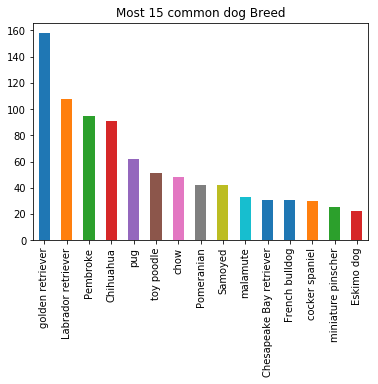

In [293]:
df['breed_predicted'].value_counts()[:15].plot(kind='bar')
plt.title('Most 15 common dog Breed')
plt.show()

#### Golden Retriever, Labrador Retriever, Pembroke, and Chihuahua are the most popular dog breeds!

# Insight Two
- Average rating among dog Breeds

In [294]:
df_dog_type_mean = df.groupby('breed_predicted').mean()
df_dog_type_mean.head()

rating_numerator  rating_denominator  \
breed_predicted                                                        
Afghan hound                            9.666667                10.0   
Airedale                                9.833333                10.0   
American Staffordshire terrier         10.312500                10.0   
Appenzeller                            11.000000                10.0   
Australian terrier                     11.500000                10.0   

                                number_categories    rating  img_number  \
breed_predicted                                                           
Afghan hound                             0.000000  0.966667    1.000000   
Airedale                                 0.083333  0.983333    1.166667   
American Staffordshire terrier           0.187500  1.031250    1.187500   
Appenzeller                              0.000000  1.100000    1.000000   
Australian terrier                       0.000000  1.150000    2.000000   

                                prediction_confidence     favorites   retweets  
breed_predicted                                                                 
Afghan hound                                 0.433959  17326.666667  5976.0000  
Airedale                                     0.583771   5280.833333  1393.7500  
American Staffordshire terrier               0.527359   9380.187500  2310.8125  
Appenzeller                                  0.503665   7317.500000  1458.0000  
Australian terrier                           0.307584  11127.500000  3078.5000

In [295]:
df_dog_type_mean['rating'].sort_values()

breed_predicted
Japanese spaniel               0.500000
soft-coated wheaten terrier    0.880000
Scotch terrier                 0.900000
Walker hound                   0.900000
Tibetan terrier                0.925000
dalmatian                      0.933333
Boston bull                    0.941667
Welsh springer spaniel         0.950000
Maltese dog                    0.952632
Dandie Dinmont                 0.957143
miniature schnauzer            0.960000
Norwich terrier                0.960000
Afghan hound                   0.966667
redbone                        0.966667
Scottish deerhound             0.975000
Rhodesian ridgeback            0.975000
Airedale                       0.983333
Newfoundland                   0.985714
Mexican hairless               0.985714
Saint Bernard                  0.985714
English setter                 0.987500
miniature poodle               0.987500
miniature pinscher             1.000000
groenendael                    1.000000
Italian greyhound       

# Insight three
- Dog Types

In [297]:
# the count od types of dog
df.dog_type.value_counts()

Pupper     228
Doggo       79
Puppo       27
Floofer      8
Name: dog_type, dtype: int64

In [298]:
df.dog_type.value_counts().plot(kind= 'bar')
plt.title('Counts of Dog Types')
plt.show()

### Pupper is the most common dog category ,Doggo,puppo,finaly floofer

# Insight Four

- Account Popularity over Time

  Account Popularity based on the numbers of Favorites and Retweets over time.


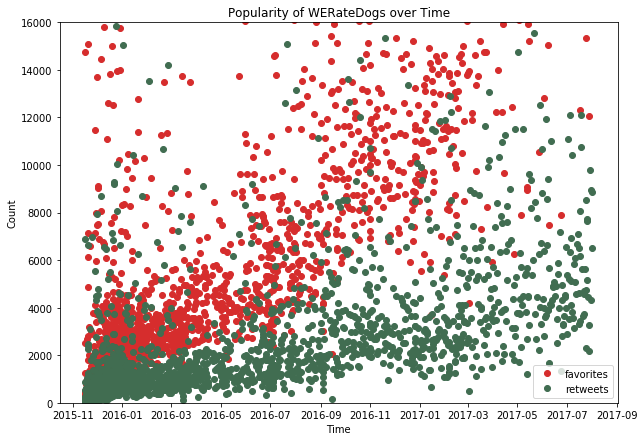

In [304]:
d = pd.DataFrame(df['timestamp'])
fig, ax = plt.subplots(figsize=(10,7))
ax.plot_date(d,df['favorites'], color="#d62d2d")
ax.plot_date(d,df['retweets'], color="#416d51")
ax.set_ylim([0,16000])
ax.set_title('Popularity of WERateDogs over Time')

# Setting x and y labels.
ax.set_ylabel('Count')
ax.set_xlabel('Time')
ax.legend()